In [46]:
import os
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# Results from other Text Analyzers

## Computer Science

### Jstor

This search engine has its own text analyzer. It requires human labor to label quality scores.

In [3]:
# score
jstor_cs_phrases = {"Psychotherapy": 0.99,
"Machine learning": 0.1,
"Text analytics": 0.95,
"Health care quality": 0.55,
"Academic aptitude": 0.3,
"Art therapy": 0.66,
"Big data": 0.5,
"Biomedical data": 0.55,
"Computer centers": 0.5,
"Audio engineering": 0.9,
"Code pages": 0.1,
"Compensatory education": 0.2,
"Computer programming": 0.9,
"Data analysis": 0.65,
"Data collection": 0.7,
"Educational technology": 0.3,
"Data transcription": 0.65,
"Data models": 0.8,
"Government information": 0.3,
"Health care utilization": 0.5,
"In state students": 0.1,
"Information attributes": 0.4,
"Learning": 0.1,
"Learning by doing": 0.1,
"Logistic regression": 0.7,
"Learning strategies": 0.1,
"Out of state students": 0.25,
"Psychological research": 0.95,
"Public health": 0.75,
"Speech acts": 0.7,
"School counseling": 0.6,
"Second language learning": 0.15,
"Student interests": 0.2,
"Students": 0.3,
"Time series": 0.75,
"Test theory": 0.6,
"Small area data": 0.6,
"Surveillance": 0.9,
"Time series forecasting": 0.8,
"ZIP codes": 0.2}

In [36]:
jstor_cs_labels = [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]

### AutoPhrase

In [44]:
dirs = os.listdir('../references/experiment data')
#dirs.remove('.DS_Store')
dirs

['Mathematics',
 'Statistics',
 'Quantitative Finance',
 'Economics',
 'Physics',
 'Quantitative Biology',
 'Computer Science',
 'Electrical Engineering and Systems Science']

In [89]:
weighted = {}
weighted_all = {}
weighted_stats = pd.DataFrame()
for directory in dirs:
    try:
        fp = '../references/experiment data/' + directory + '/weighted_AutoPhrase.csv'
        df = pd.read_csv(fp, index_col='Unnamed: 0')
        weighted_all[directory] = df
        df = df[df['score'] > 0.5]
        weighted[directory] = df
        weighted_stats[directory] = df['score'].describe()
    except:
        pass
weighted_df = pd.concat(weighted, axis=1)
weighted_df.head(15)

Economics                        Computer Science          
                    phrase     score                        phrase     score
0       affirmative action  0.854857                 mental health  0.917283
1            school choice  0.765075  automatic speech recognition  0.876298
2  incentive compatibility  0.723872               substance abuse  0.871875
3                 american  0.513310              machine learning  0.833653
4                  college  0.500523            speech recognition  0.684244
5                      NaN       NaN                    real world  0.549731
6                      NaN       NaN               utterance level  0.502412

In [86]:
autophrase_cs_df = weighted_df['Computer Science'].dropna()
autophrase_cs_df

,phrase,score
0,mental health,0.917283
1,automatic speech recognition,0.876298
2,substance abuse,0.871875
3,machine learning,0.833653
4,speech recognition,0.684244
5,real world,0.549731
6,utterance level,0.502412


In [87]:
autophrase_cs_labels = [1, 1, 0, 1, 1, 0, 0]

### Webtools: https://www.webtools.services/text-analyzer

This website tool helps us find the frequency of phrases in a document. We then standardize it to form scores in range of 0 to 1.

In [93]:
webtools_cs_phrases = {"of the": 74,
"et al": 45,
"to the": 36,
"in the": 28,
"for the": 27,
"in order": 15,
"the therapist": 15,
"and the": 15,
"in order to": 14,
"the system": 14,
"by the": 13,
"it is": 12,
"of a": 12,
"the session": 12,
"at the": 12,
"from the": 12,
"of psychotherapy": 11,
"able to": 11,
"with the": 10,
"we have": 10,
"we are": 10,
"is not": 10,
"the two": 10,
"between the": 10,
"university of": 9,
"in a": 9,
"has been": 9,
"behavioral coding": 9,
"of the system": 9,
"speech and": 8,
"more than": 8,
"is a": 8,
"as a": 8,
"a variety of": 8,
"in this": 8,
"based on": 8,
"the client": 8,
"to be": 8,
"using the": 8,
"automated evaluation": 7}

In [96]:
# standardize it
fre_min = min(webtools_cs_phrases.values())
fre_max = max(webtools_cs_phrases.values())
for key in webtools_cs_phrases:
    cur = webtools_cs_phrases[key]
    webtools_cs_phrases[key] = (cur - fre_min) / (fre_max - fre_min)
webtools_cs_phrases

{'of the': 1.0,
 'et al': 0.5671641791044776,
 'to the': 0.43283582089552236,
 'in the': 0.31343283582089554,
 'for the': 0.29850746268656714,
 'in order': 0.11940298507462686,
 'the therapist': 0.11940298507462686,
 'and the': 0.11940298507462686,
 'in order to': 0.1044776119402985,
 'the system': 0.1044776119402985,
 'by the': 0.08955223880597014,
 'it is': 0.07462686567164178,
 'of a': 0.07462686567164178,
 'the session': 0.07462686567164178,
 'at the': 0.07462686567164178,
 'from the': 0.07462686567164178,
 'of psychotherapy': 0.05970149253731343,
 'able to': 0.05970149253731343,
 'with the': 0.04477611940298507,
 'we have': 0.04477611940298507,
 'we are': 0.04477611940298507,
 'is not': 0.04477611940298507,
 'the two': 0.04477611940298507,
 'between the': 0.04477611940298507,
 'university of': 0.029850746268656716,
 'in a': 0.029850746268656716,
 'has been': 0.029850746268656716,
 'behavioral coding': 0.029850746268656716,
 'of the system': 0.029850746268656716,
 'speech and': 0.0

In [102]:
webtools_cs_labels = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
len(webtools_cs_labels)

40

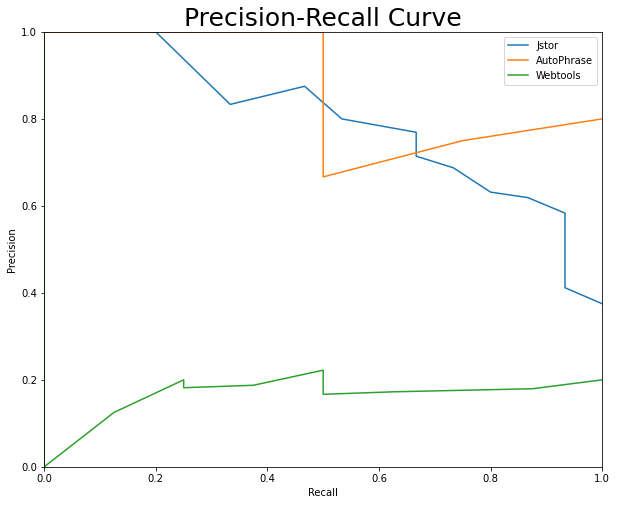

In [103]:
plt.figure(figsize=(10, 8))
# jstor
precision, recall, thresholds = precision_recall_curve(
        y_true=jstor_cs_labels,
        probas_pred=list(jstor_cs_phrases.values()))
plt.plot(recall, precision, scalex=False, scaley=False, label = "Jstor")
# autophrase
precision, recall, thresholds = precision_recall_curve(
        y_true=autophrase_cs_labels,
        probas_pred=autophrase_cs_df.score)
plt.plot(recall, precision, scalex=False, scaley=False, label = "AutoPhrase")
# webtools
precision, recall, thresholds = precision_recall_curve(
        y_true=webtools_cs_labels,
        probas_pred=list(webtools_cs_phrases.values()))
plt.plot(recall, precision, scalex=False, scaley=False, label = "Webtools")
plt.title('Precision-Recall Curve', fontsize=25)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.show()

### MonkeyLearn: https://monkeylearn.com/text-analyzer/

This text analyzer extracts keywords from the document. It requires human labor to label quality scores.

In [107]:
monkeylearn_cs_phrases = {"sessions": 0.45,
"codes": 0.1,
"utterances": 0.5,
"behavioral coding": 0.7,
"therapist": 0.65,
"international speech communication": 0.3,
"Automatic Speech Recognition": 0.9,
"speech communication association": 0.8,
"Proc": 0.1,
"psychotherapy": 0.95}

In [108]:
monkeylearn_cs_labels = [1, 0, 0, 1, 1, 1, 1, 1, 0, 1]

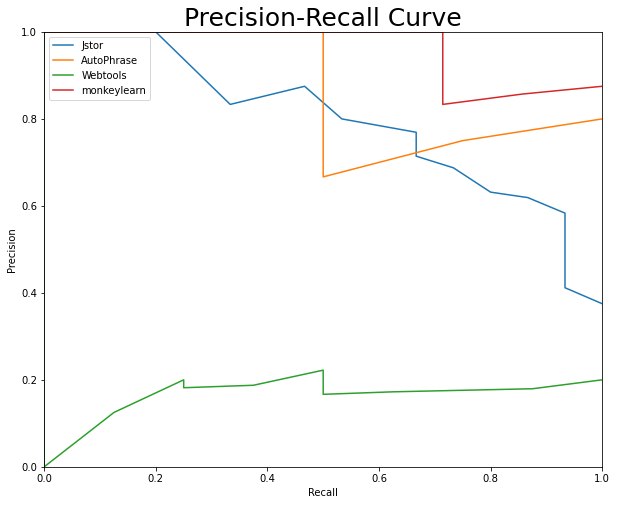

In [109]:
plt.figure(figsize=(10, 8))
# jstor
precision, recall, thresholds = precision_recall_curve(
        y_true=jstor_cs_labels,
        probas_pred=list(jstor_cs_phrases.values()))
plt.plot(recall, precision, scalex=False, scaley=False, label = "Jstor")
# autophrase
precision, recall, thresholds = precision_recall_curve(
        y_true=autophrase_cs_labels,
        probas_pred=autophrase_cs_df.score)
plt.plot(recall, precision, scalex=False, scaley=False, label = "AutoPhrase")
# webtools
precision, recall, thresholds = precision_recall_curve(
        y_true=webtools_cs_labels,
        probas_pred=list(webtools_cs_phrases.values()))
plt.plot(recall, precision, scalex=False, scaley=False, label = "Webtools")
# monkeylearn
precision, recall, thresholds = precision_recall_curve(
        y_true=monkeylearn_cs_labels,
        probas_pred=list(monkeylearn_cs_phrases.values()))
plt.plot(recall, precision, scalex=False, scaley=False, label = "monkeylearn")
plt.title('Precision-Recall Curve', fontsize=25)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.show()